In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ticktack
from jax import jit
import jax.numpy as jnp
from ticktack import fitting, resample
from scipy import signal
from scipy.interpolate import interp1d
plt.rcParams['figure.figsize'] = (8.0, 6.0)
#from helper import run_resample, load_IntCal20
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

In [4]:
data = pd.read_csv("../data/Miyahara.csv")

<ErrorbarContainer object of 3 artists>

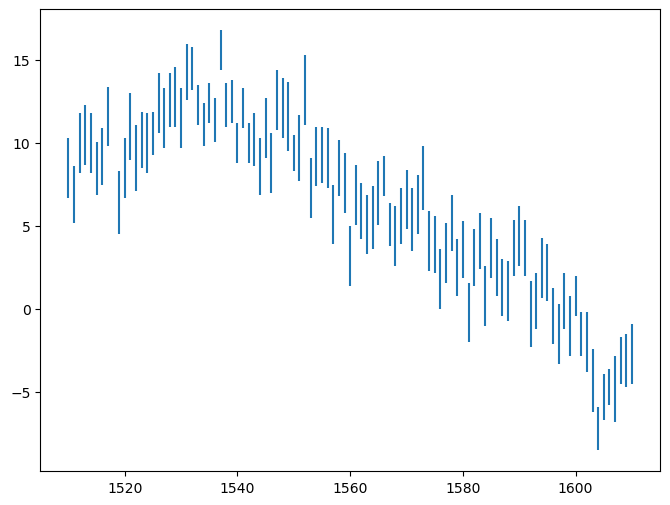

In [5]:
plt.errorbar(data.year, data.d14c, yerr=data.sig_d14c, linestyle='None')

In [6]:
resampler = resample.Resampler()
resampler.load_data(data.year, data.d14c, data.sig_d14c)
resampler.annual = np.arange(np.ceil(resampler.start), np.floor(resampler.end + 1))
new_signal = resampler.signal_resample()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [7]:
f = interp1d(resampler.x, resampler.y, kind="cubic")
interpolation = f(resampler.annual)
sig = resampler.bandpass_super_gaussian(interpolation, l=1./9.677, sz=0.05, order=30)

(10000, 101)


Error in callback <function _draw_all_if_interactive at 0x7fb9950502c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

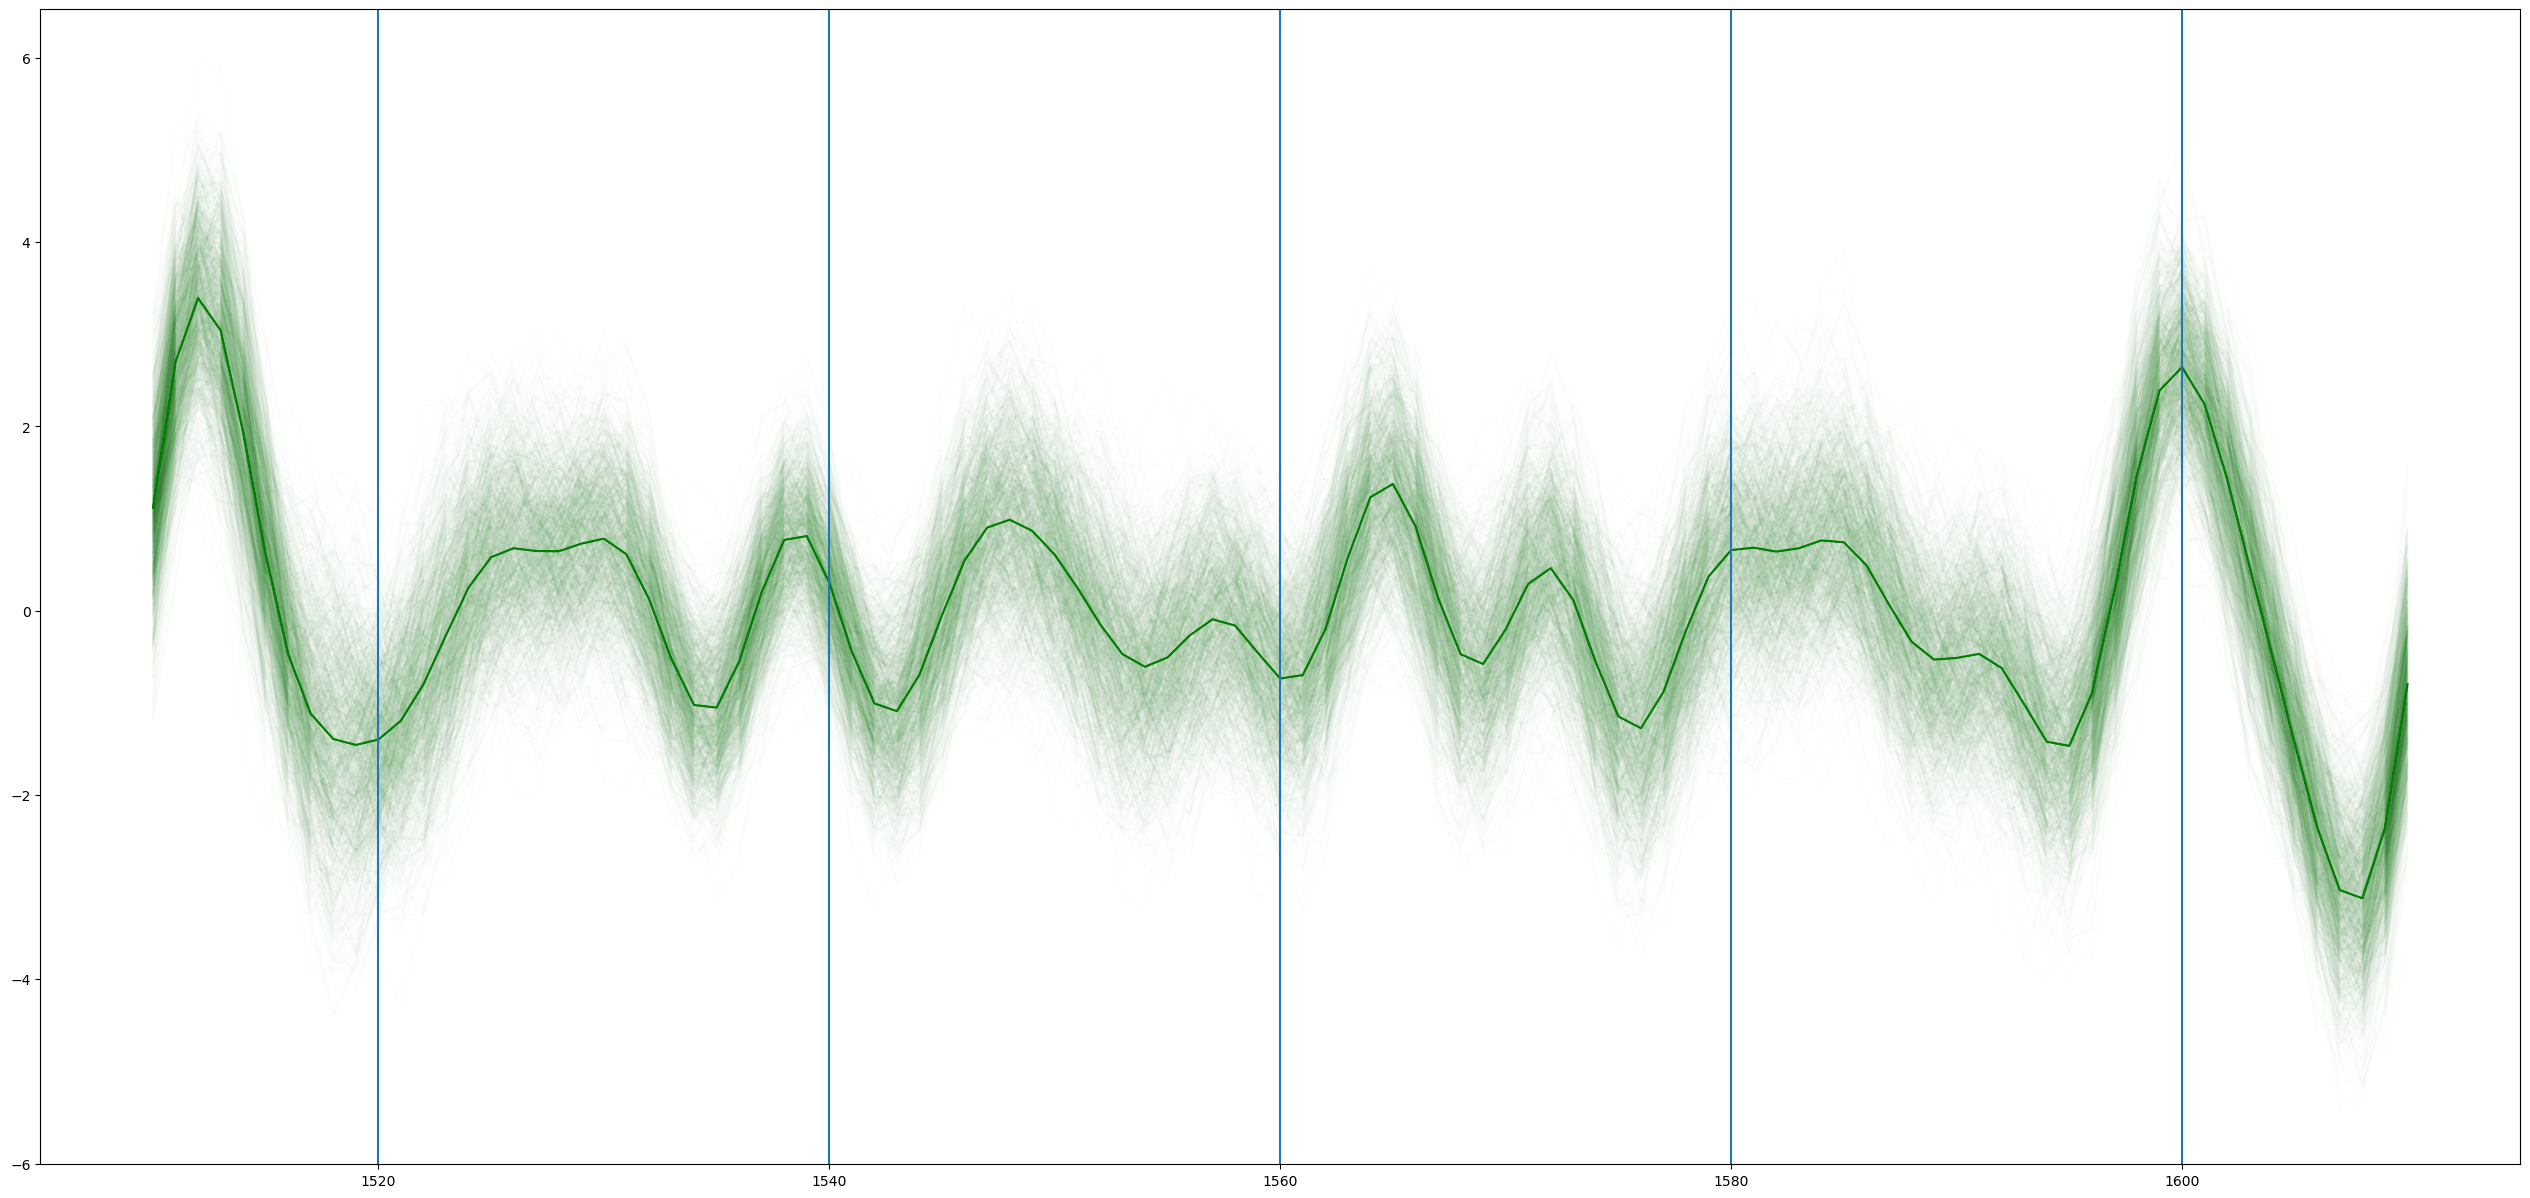

In [8]:
fig, axs = plt.subplots(1, figsize=(32, 15), sharex=True)
print(new_signal.shape)
axs.plot(resampler.annual, sig, color="g")
for i in np.random.randint(10000, size=1000):
    axs.plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs.axvline(1520)
axs.axvline(1540)
axs.axvline(1560)
axs.axvline(1580)
axs.axvline(1600)

[[ 1.00884166  3.55406436  4.59393484 ... -4.32010194 -3.95190304
  -1.93561179]
 [ 0.92014062  1.38334924  1.19091471 ... -2.24090765 -1.40651675
  -0.15869728]
 [ 0.72482307  3.22005331  4.41488383 ... -4.2239406  -3.89304684
  -2.02896912]
 ...
 [ 0.66026565  1.70017851  2.30907497 ... -3.27475675 -2.23187938
  -0.75351091]
 [ 1.18612978  2.72284747  3.24143835 ... -3.48605371 -2.57404109
  -0.83096918]
 [ 1.14346273  2.44971019  2.71938029 ... -3.36105218 -2.47404871
  -0.75755386]]


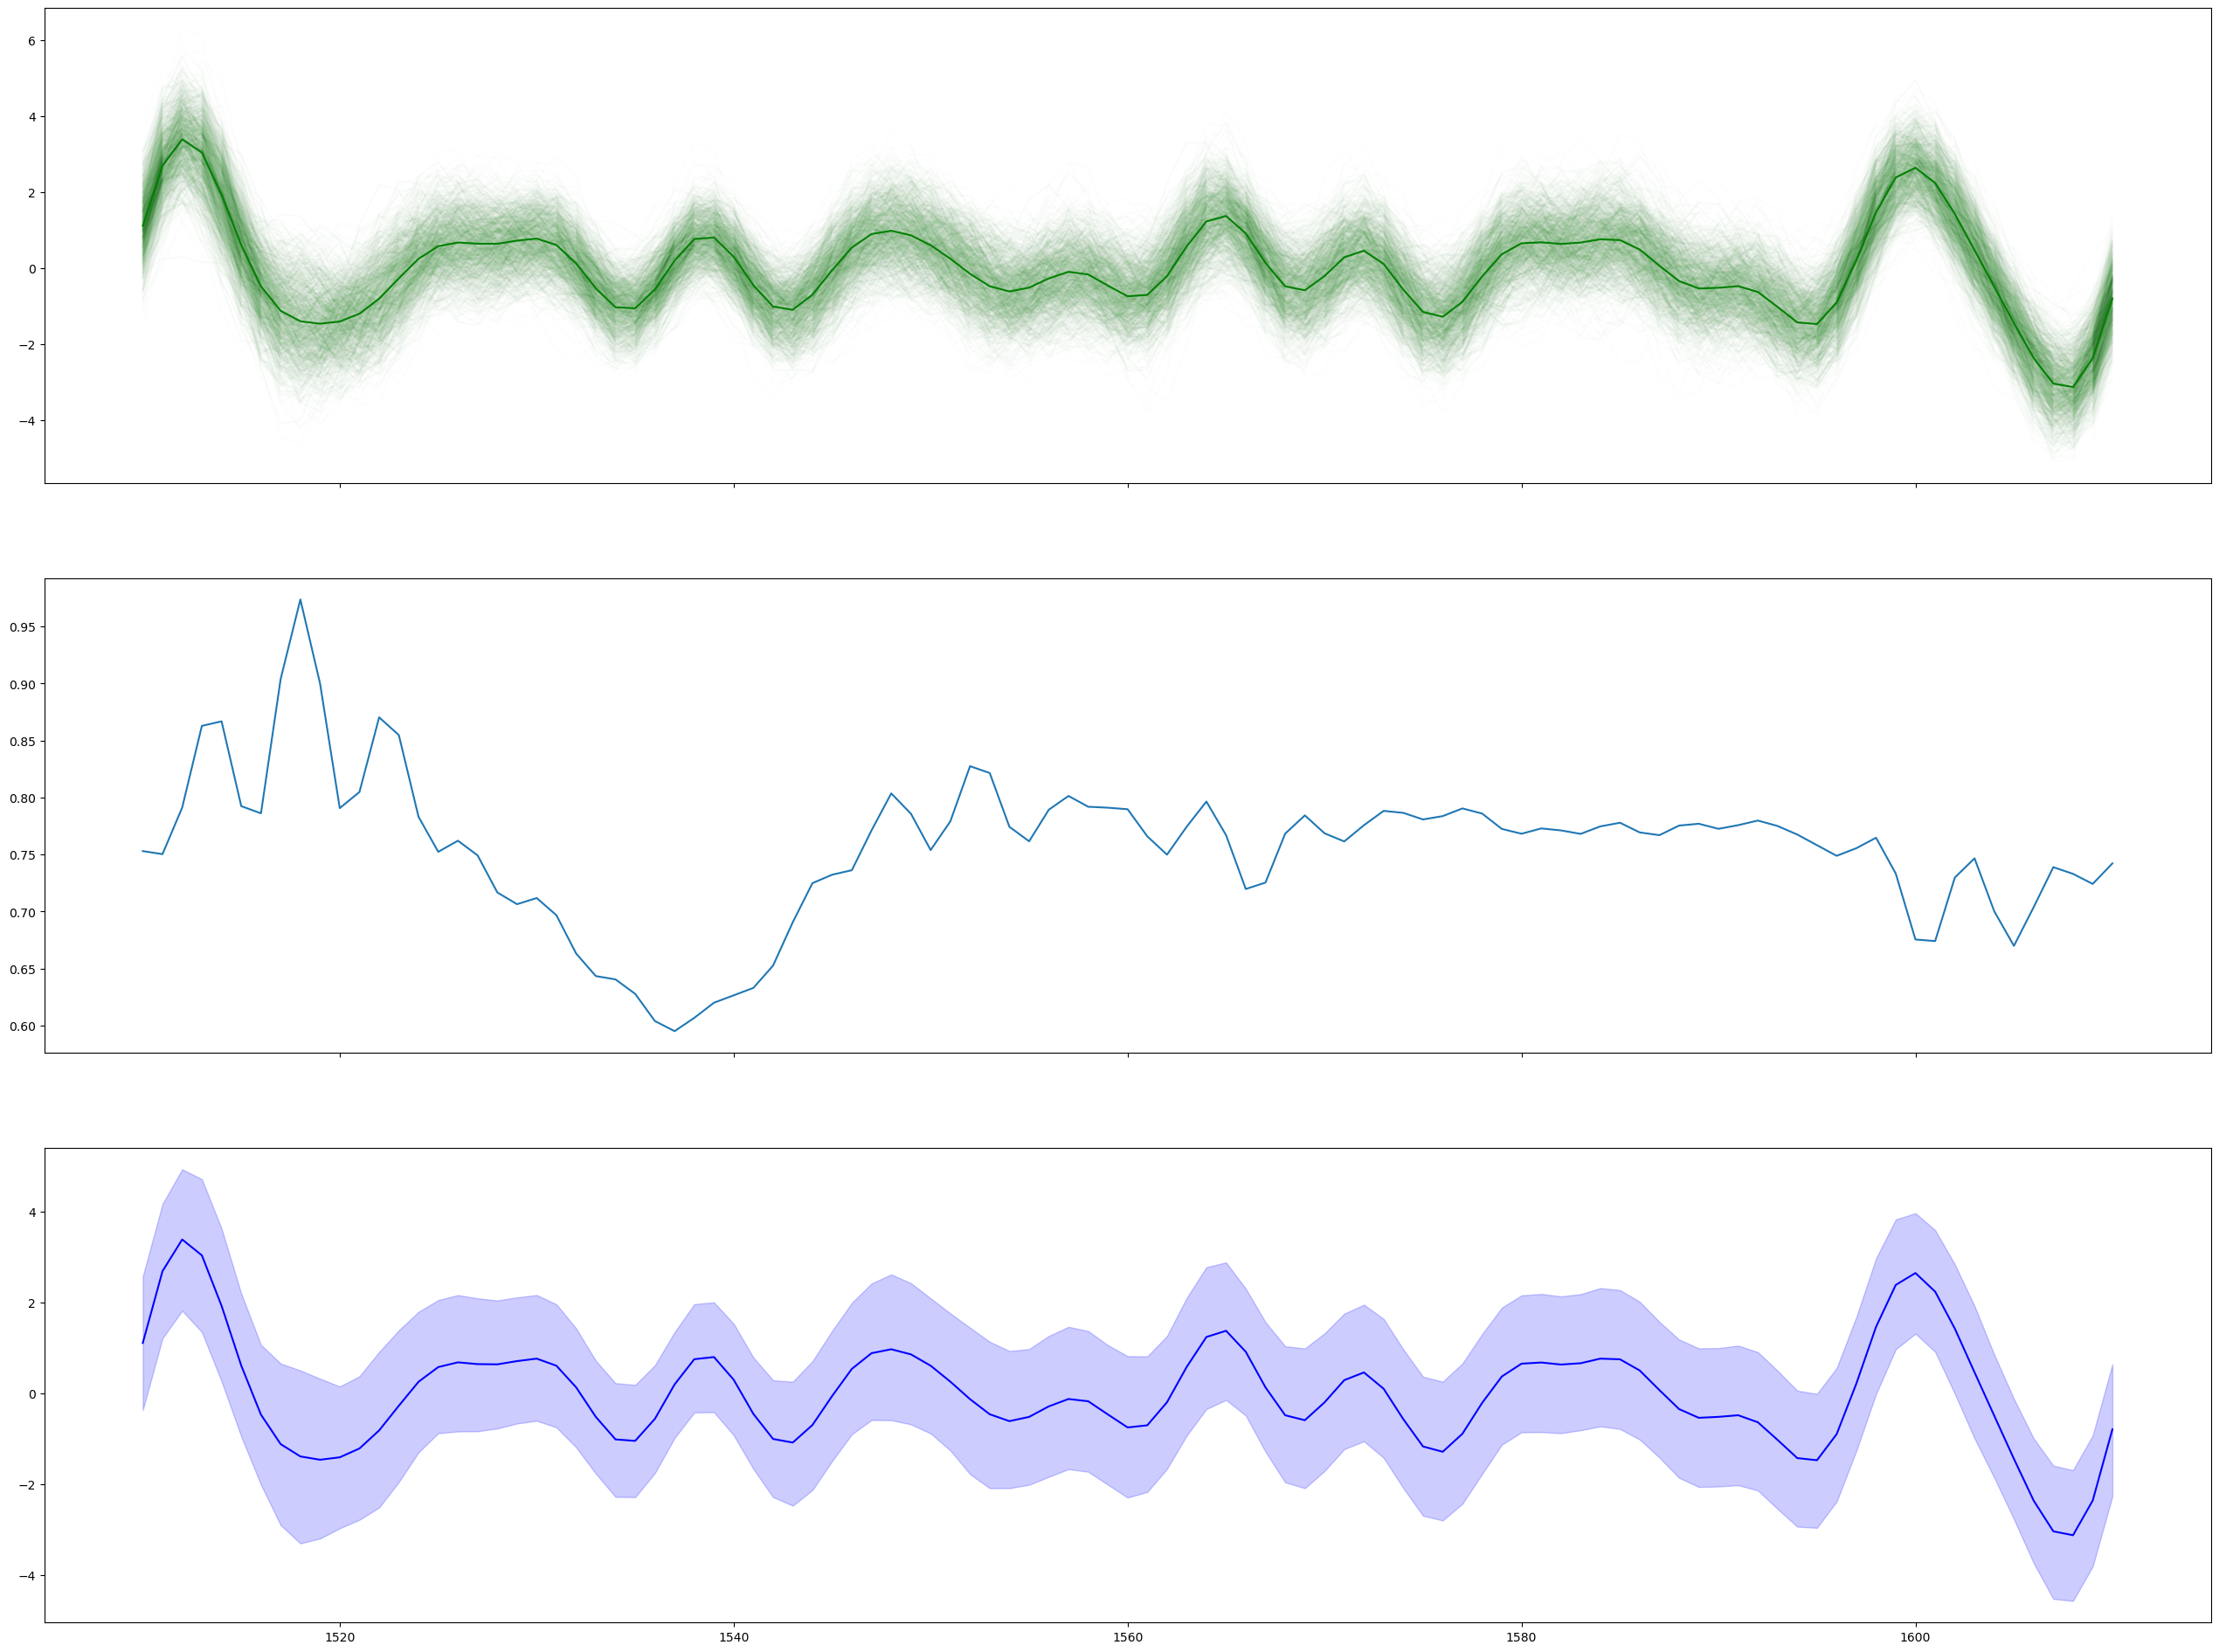

In [ ]:
fig, axs = plt.subplots(3, figsize=(32, 24), sharex=True)
for i in np.random.randint(10000, size=1000):
    axs[0].plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs[0].plot(resampler.annual, sig, color="g")
axs[1].plot(resampler.annual, np.std(new_signal, axis=0))
l, m, u = np.percentile(new_signal, (2.5, 50, 97.5 ), axis=0)
axs[2].fill_between(resampler.annual, l, u, color = 'b', alpha=0.2)
axs[2].plot(resampler.annual, m, color = 'b')
print(new_signal)

In [ ]:
rng = np.random.default_rng()
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += rng.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

[ -0.98441629  16.40319306  18.76472146 ... -12.68928759 -19.60800733
 -14.15389869]
[-0.31059452 -0.06800078  0.38492095 ... -1.42740701 -0.5543548
 -0.36428306]


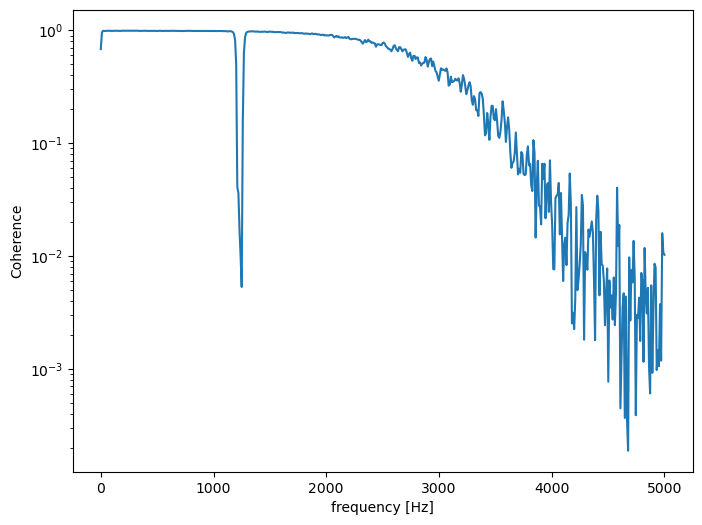

In [ ]:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

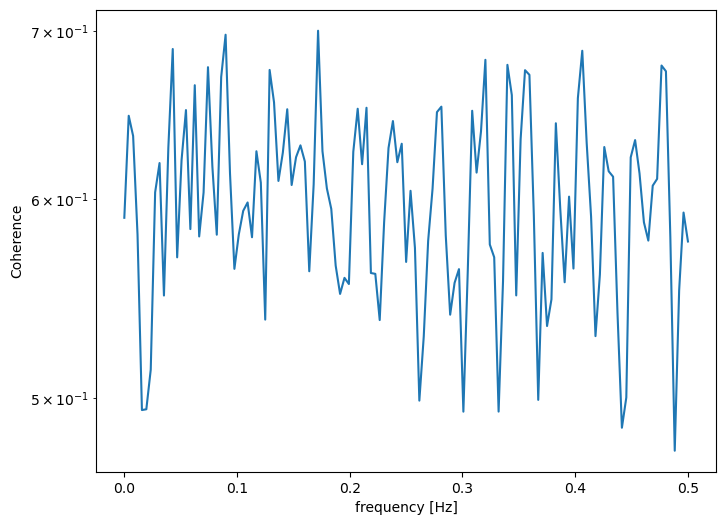

In [ ]:
testset1 = new_signal[0,:]
testset2 = new_signal[1,:]
testset3 = new_signal[:,0]
testset4 = new_signal[:,1]
g, Pxy = signal.coherence(testset3, testset4)
plt.semilogy(g, Pxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

In [ ]:
minnie = 1
maxie = 0
pmin = 0
for p in range(1,101):
    testset5 = new_signal[:,p]
    g, Pxy = signal.coherence(testset3, testset5)
    if min(Pxy) < minnie:
        minnie = min(Pxy)
        pmin=p
    if max(Pxy) > maxie:
        maxie = max(Pxy)
print(minnie, maxie)
print(testset3,new_signal[:,pmin])

1.660575988309459e-07 0.7854762213922202
[1.00884166 0.92014062 0.72482307 ... 0.66026565 1.18612978 1.14346273] [1.28470178 0.29040526 1.17498723 ... 0.62185235 1.91447743 0.391784  ]
